In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import Ridge


# Data Socio Economic Indonesia 2021

https://www.kaggle.com/datasets/dannytheodore/socio-economic-of-indonesia-in-2021

Indonesia merupakan negara kepulauan yang terletak di Asia Tenggara. Dalam dataset ini terdapat beberapa variabel sosial-ekonomi Indonesia pada tahun 2021. Data ini dikumpulkan dari beberapa laporan Badan Pusat Statistik (BPS). Variabel-variabel ini adalah:

- Provinsi
- Kota/Kabupaten
- Persentase Penduduk Miskin
- PDRB (dalam miliar)
- Angka Harapan Hidup (AHH)
- Rata-rata Lama Sekolah
- Pengeluaran per Kapita

In [2]:
dataset = pd.read_csv("D:/PENS22/SEMESTER 5/Ekonometrika/Data Ekonometrika/2021socio_economic_indonesia.csv")
dataset


,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577
...,...,...,...,...,...,...,...
509,Papua,Puncak,36.26,1.438,66.060,2.16,5412
510,Papua,Dogiyai,28.81,1.356,65.845,4.94,5415
511,Papua,Intan Jaya,41.66,1.274,65.580,3.09,5328
512,Papua,Deiyai,40.59,1.439,65.355,3.25,4673


# Pemodelan

In [3]:
# Menyiapkan variabel independen (X) dan dependen (y)
X = dataset.iloc[:, 2:-1]
y = dataset.iloc[:, -1]

# Menambahkan konstanta ke model 
X = sm.add_constant(X)


# Membangun model regresi
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             exp_percap   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     224.0
Date:                Fri, 27 Sep 2024   Prob (F-statistic):          1.01e-110
Time:                        21:09:04   Log-Likelihood:                -4532.3
No. Observations:                 514   AIC:                             9075.
Df Residuals:                     509   BIC:                             9096.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4510.8209   1862.227     -2.422      0.016   -8169.418    -852.224
poorpeople_percentage  -114.8446     12.750     -9.008      0.000    -139.893     -89.796
reg_gdp                   6.6306      0.888      7.469      0.000       4.886       8.375
life_exp                152.7217     25.688      5.945      0.000     102.254     203.189
avg_schooltime          637.9379     54.143     11.782      0.000     531.566     744.309
==============================================================================
Omnibus:                        9.437   Durbin-Watson:                   1.076
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               13.620
Skew:                           0.138   Prob(JB):                      0.00110
Kurtosis:                       3.748   Cond. No.                     2.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Uji Multikolinearitas

In [4]:
# Multikolinieritas menggunakan VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                 Feature         VIF
0                  const  661.151227
1  poorpeople_percentage    1.720766
2                reg_gdp    1.062072
3               life_exp    1.499581
4         avg_schooltime    1.483543


# Uji Heterokedastisitas

In [5]:
# Uji heteroskedastisitas menggunakan Breusch-Pagan
_, pval, _, f_pval = het_breuschpagan(model.resid, model.model.exog)
print('P-value Breusch-Pagan Test:', pval)

P-value Breusch-Pagan Test: 3.935526730600195e-20


# Residual plot

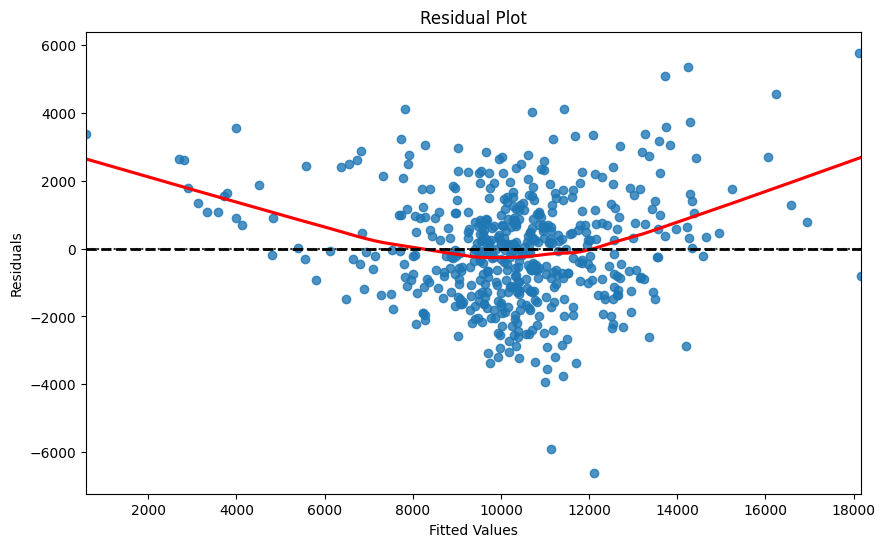

In [6]:
# Residuals dari model
residuals = model.resid

# Membuat plot residual
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='black', linewidth=2)
plt.show()

# Percobaan

In [7]:
data = dataset
data

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577
...,...,...,...,...,...,...,...
509,Papua,Puncak,36.26,1.438,66.060,2.16,5412
510,Papua,Dogiyai,28.81,1.356,65.845,4.94,5415
511,Papua,Intan Jaya,41.66,1.274,65.580,3.09,5328
512,Papua,Deiyai,40.59,1.439,65.355,3.25,4673


In [8]:
# Transformasi logaritma 
data['log_exp_percap'] = np.log(data['exp_percap'])

In [9]:
# Lasso

X = data[['poorpeople_percentage', 'life_exp', 'reg_gdp', 'avg_schooltime']]  # Variabel independen
y = data['log_exp_percap']  

# Transformasi Square root
y_sqrt = np.sqrt(y)

X_train, X_test, y_train_sqrt, y_test_sqrt = train_test_split(X, y_sqrt, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso Regression 
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train_sqrt)

y_pred_train_sqrt = lasso.predict(X_train_scaled)
residuals_sqrt = y_train_sqrt - y_pred_train_sqrt
X_train_with_const = sm.add_constant(X_train_scaled)

_, pval, _, f_pval = het_breuschpagan(residuals_sqrt, X_train_with_const)

print('Breusch-Pagan Test Statistics:')
print(pval)

if pval < 0.05:
    print("Terdapat bukti untuk menolak hipotesis nol, menunjukkan adanya heteroskedastisitas.")
else:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol, menunjukkan tidak ada heteroskedastisitas.")

Breusch-Pagan Test Statistics:
5.942215769900212e-30
Terdapat bukti untuk menolak hipotesis nol, menunjukkan adanya heteroskedastisitas.


In [10]:
# OLS with Square Root and Normalization

X = data[['poorpeople_percentage', 'life_exp', 'reg_gdp', 'avg_schooltime']]  # Variabel independen
y = data['log_exp_percap']

y_sqrt = np.sqrt(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train_sqrt, y_test_sqrt = train_test_split(X_scaled, y_sqrt, test_size=0.2, random_state=42)

X_train_with_const = sm.add_constant(X_train_scaled)

model = sm.OLS(y_train_sqrt, X_train_with_const)
results = model.fit()
print(results.summary())

X_test_with_const = sm.add_constant(X_test_scaled)
y_pred_test_sqrt = results.predict(X_test_with_const)

residuals_sqrt = y_train_sqrt - results.predict(X_train_with_const)

_, pval, _, f_pval = het_breuschpagan(residuals_sqrt, X_train_with_const)

print('Breusch-Pagan Test Statistics:')
print(pval)

# Interpretasi hasil
if pval < 0.05:
    print("Terdapat bukti untuk menolak hipotesis nol, menunjukkan adanya heteroskedastisitas.")
else:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol, menunjukkan tidak ada heteroskedastisitas.")

                            OLS Regression Results                            
Dep. Variable:         log_exp_percap   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     193.9
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           8.70e-93
Time:                        21:09:05   Log-Likelihood:                 934.35
No. Observations:                 411   AIC:                            -1859.
Df Residuals:                     406   BIC:                            -1839.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0338      0.001   2450.155      0.0

In [11]:
# Weighted Least Square with Box-cox and Normalization


X = data[['poorpeople_percentage', 'life_exp', 'reg_gdp', 'avg_schooltime']]  # Variabel independen
y = data['log_exp_percap']  # Variabel dependen

# Transformasi Box-Cox pada variabel dependen
y_boxcox, lambda_boxcox = stats.boxcox(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train_scaled, X_test_scaled, y_train_boxcox, y_test_boxcox = train_test_split(X_scaled, y_boxcox, test_size=0.2, random_state=42)

# Tambahkan konstanta 
X_train_with_const = sm.add_constant(X_train_scaled)

# Fit model regresi WLS
model_wls = sm.WLS(y_train_boxcox, X_train_with_const)
results_wls = model_wls.fit()

# Tampilkan ringkasan model
print(results_wls.summary())

# Prediksi pada data uji
X_test_with_const = sm.add_constant(X_test_scaled)
y_pred_test_boxcox = results_wls.predict(X_test_with_const)

# Hitung residual untuk uji heteroskedastisitas
residuals_boxcox = y_train_boxcox - results_wls.predict(X_train_with_const)

# Uji heteroskedastisitas menggunakan Breusch-Pagan
_, pval_boxcox, _, f_pval_boxcox = het_breuschpagan(residuals_boxcox, X_train_with_const)

# Output hasil uji
print('Breusch-Pagan Test Statistics untuk model WLS:')
print(pval_boxcox)

# Interpretasi hasil
if pval_boxcox < 0.05:
    print("Terdapat bukti untuk menolak hipotesis nol, menunjukkan adanya heteroskedastisitas.")
else:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol, menunjukkan tidak ada heteroskedastisitas.")


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.647
Model:                            WLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     185.6
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           2.75e-90
Time:                        21:09:05   Log-Likelihood:                -2788.2
No. Observations:                 411   AIC:                             5586.
Df Residuals:                     406   BIC:                             5606.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3058.1303     10.624    287.856      0.0

In [12]:
# OLS with robust and tranformation log

X = data[['poorpeople_percentage', 'life_exp', 'reg_gdp', 'avg_schooltime']]
y = data['exp_percap']

y_log = np.log(y)

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
X_train_with_const = sm.add_constant(X_train)

model = sm.OLS(y_train_log, X_train_with_const)
results = model.fit(cov_type='HC3') 
print(results.summary())

X_test_with_const = sm.add_constant(X_test)
y_pred_test_log = results.predict(X_test_with_const)

residuals_log = y_train_log - results.predict(X_train_with_const)

_, pval, _, f_pval = het_breuschpagan(residuals_log, X_train_with_const)

print('Breusch-Pagan Test P-value:')
print(pval)

if pval < 0.05:
    print("Terdapat bukti untuk menolak hipotesis nol, menunjukkan adanya heteroskedastisitas.")
else:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol, menunjukkan tidak ada heteroskedastisitas.")


                            OLS Regression Results                            
Dep. Variable:         log_exp_percap   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     211.5
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           7.35e-98
Time:                        21:09:05   Log-Likelihood:                 1105.1
No. Observations:                 411   AIC:                            -2200.
Df Residuals:                     406   BIC:                            -2180.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.07

# Pemodelan Terbaik

In [13]:
data = dataset
data

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap,log_exp_percap
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148,8.874588
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776,9.079776
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180,9.009447
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030,8.990940
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577,9.056839
...,...,...,...,...,...,...,...,...
509,Papua,Puncak,36.26,1.438,66.060,2.16,5412,8.596374
510,Papua,Dogiyai,28.81,1.356,65.845,4.94,5415,8.596928
511,Papua,Intan Jaya,41.66,1.274,65.580,3.09,5328,8.580731
512,Papua,Deiyai,40.59,1.439,65.355,3.25,4673,8.449557


In [14]:
import numpy as np
# Transformasi logaritma jika diperlukan
data['log_exp_percap'] = np.log(data['exp_percap'])

# Ridge Without Outlier

In [15]:
# Inisiasi Data

X = data[['poorpeople_percentage', 'life_exp', 'reg_gdp', 'avg_schooltime']]  # Variabel independen
y = data['exp_percap']  # Variabel dependen


In [16]:
# Menghapus outlier menggunakan metode IQR

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_cleaned = X[~((X < lower_bound) | (X > upper_bound)).any(axis=1)]
y_cleaned = y[X_cleaned.index]

In [17]:
# Transformasi Square Root dan Normalisasi Data
y_sqrt = np.sqrt(y_cleaned)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

In [18]:
# Split data
X_train_scaled, X_test_scaled, y_train_sqrt, y_test_sqrt = train_test_split(X_scaled, y_sqrt, test_size=0.2, random_state=42)

In [19]:
#Regression Ridge

# Tambahkan konstanta pada variabel independen untuk Ridge
X_train_with_const = sm.add_constant(X_train_scaled)

ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train_scaled, y_train_sqrt)

# Mengambil koefisien
coef = ridge_model.coef_
feature_names = X_train.columns 

# Membuat DataFrame untuk ringkasan
summary_df = pd.DataFrame({'Fitur': feature_names,'Koefisien': coef})

print("Koefisien Ridge Regression:")
print(summary_df)

Koefisien Ridge Regression:
                   Fitur  Koefisien
0  poorpeople_percentage  -3.446278
1               life_exp   1.264452
2                reg_gdp   3.046850
3         avg_schooltime   3.883809


In [20]:
# Residual untuk uji heteroskedastisitas
residuals_sqrt = y_train_sqrt - ridge_model.predict(X_train_scaled)

# Uji heteroskedastisitas menggunakan Breusch-Pagan
_, pval, _, f_pval = het_breuschpagan(residuals_sqrt, X_train_with_const)
print('Breusch-Pagan Test Statistics untuk Ridge Regression:')
print(pval)

if pval < 0.05:
    print("Terdapat bukti untuk menolak hipotesis nol, menunjukkan adanya heteroskedastisitas.")
else:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol, menunjukkan tidak ada heteroskedastisitas.")

Breusch-Pagan Test Statistics untuk Ridge Regression:
0.12877495780954606
Tidak ada cukup bukti untuk menolak hipotesis nol, menunjukkan tidak ada heteroskedastisitas.


In [21]:
# Uji multikolinieritas dengan VIF

vif_data = pd.DataFrame()
vif_data['Feature'] = ['const'] + list(X_cleaned.columns)
vif_data['VIF'] = [variance_inflation_factor(X_train_with_const, i) for i in range(X_train_with_const.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                 Feature       VIF
0                  const  1.002584
1  poorpeople_percentage  1.201877
2               life_exp  1.508891
3                reg_gdp  1.341525
4         avg_schooltime  1.186031


In [22]:
# Uji autokorelasi dengan Durbin-Watson

dw = durbin_watson(residuals_sqrt)

print('Durbin-Watson Statistic:')
print(dw)

if dw < 1.5:
    print("Terdapat bukti autokorelasi positif.")
elif dw > 2.5:
    print("Terdapat bukti autokorelasi negatif.")
else:
    print("Tidak ada bukti autokorelasi.")

Durbin-Watson Statistic:
2.067970269503739
Tidak ada bukti autokorelasi.


In [23]:
# Uji Normalitas Residual dengan Shapiro-Wilk Test
shapiro_test = stats.shapiro(residuals_sqrt)
print("Shapiro-Wilk Test for Normality:")
print(f"Test Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

if shapiro_test.pvalue < 0.05:
    print("Hasil uji Shapiro-Wilk menunjukkan bahwa residual tidak berdistribusi normal (p < 0.05).")
else:
    print("Hasil uji Shapiro-Wilk menunjukkan bahwa residual berdistribusi normal (p >= 0.05).")

Shapiro-Wilk Test for Normality:
Test Statistic: 0.9968230724334717, p-value: 0.7528855800628662
Hasil uji Shapiro-Wilk menunjukkan bahwa residual berdistribusi normal (p >= 0.05).


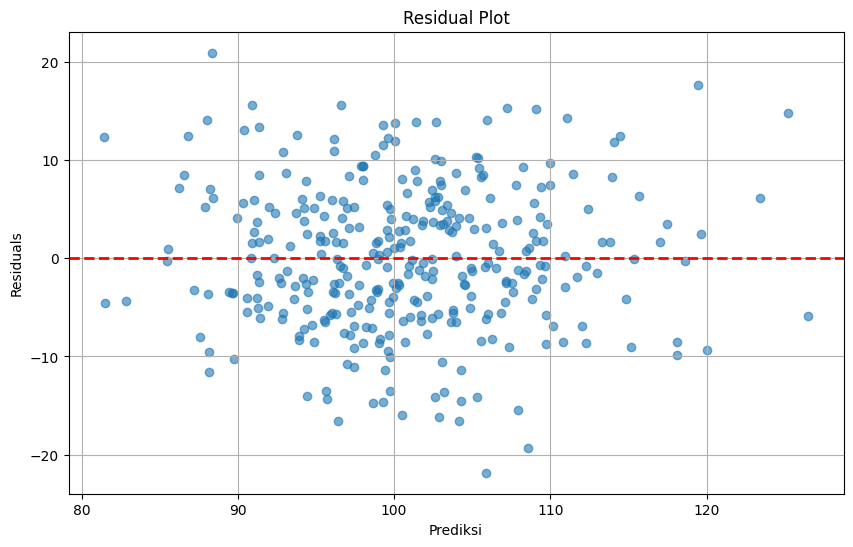

In [24]:
# residual plot

plt.figure(figsize=(10, 6))
plt.scatter(ridge_model.predict(X_train_scaled), residuals_sqrt, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Prediksi')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# WLS

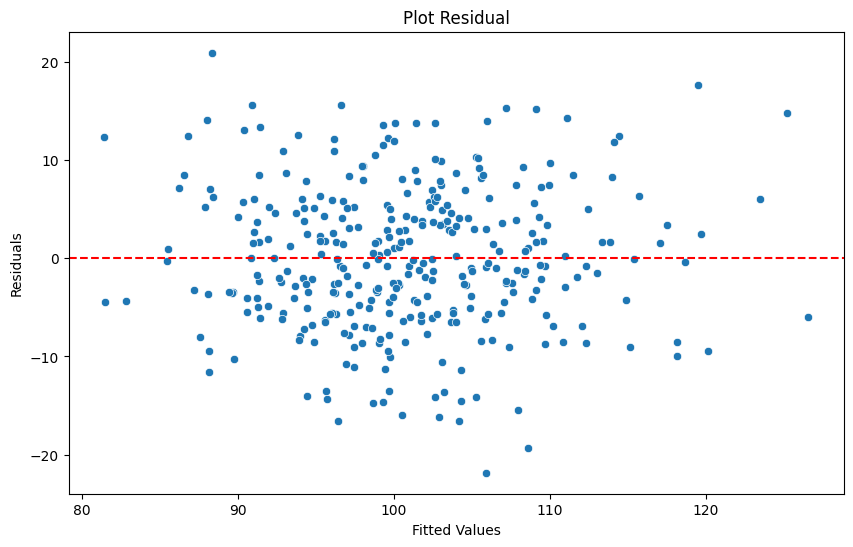

Breusch-Pagan Test Statistics untuk WLS:
0.12793437765306934
Tidak ada cukup bukti untuk menolak hipotesis nol, menunjukkan tidak ada heteroskedastisitas.
Durbin-Watson Statistic untuk WLS:
2.0675353351944166
Tidak ada bukti autokorelasi.


In [25]:
# Weighted Least Square Without Outlier

X = data[['poorpeople_percentage', 'life_exp', 'reg_gdp', 'avg_schooltime']]
y = data['exp_percap']

# Menghapus outlier menggunakan metode IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
X_cleaned = X[~((X < lower_bound) | (X > upper_bound)).any(axis=1)]
y_cleaned = y[X_cleaned.index]

# Transformasi sqrt pada variabel dependen
y_sqrt = np.sqrt(y_cleaned)

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Split data
X_train_scaled, X_test_scaled, y_train_sqrt, y_test_sqrt = train_test_split(X_scaled, y_sqrt, test_size=0.2, random_state=42)

# Tambahkan konstanta pada variabel independen
X_train_with_const = sm.add_constant(X_train_scaled)

# Fit model WLS
model = sm.WLS(y_train_sqrt, X_train_with_const).fit()

# Hitung residual
residuals = model.resid

# 1. Plot residual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Plot Residual')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# 2. Uji heteroskedastisitas menggunakan Breusch-Pagan
_, pval_bp, _, _ = het_breuschpagan(residuals, model.model.exog)

print('Breusch-Pagan Test Statistics untuk WLS:')
print(pval_bp)

# Interpretasi hasil uji heteroskedastisitas
if pval_bp < 0.05:
    print("Terdapat bukti untuk menolak hipotesis nol, menunjukkan adanya heteroskedastisitas.")
else:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol, menunjukkan tidak ada heteroskedastisitas.")

# 3. Uji autokorelasi dengan Durbin-Watson
dw = durbin_watson(residuals)

print('Durbin-Watson Statistic untuk WLS:')
print(dw)

# Interpretasi hasil uji autokorelasi
if dw < 1.5:
    print("Terdapat bukti autokorelasi positif.")
elif dw > 2.5:
    print("Terdapat bukti autokorelasi negatif.")
else:
    print("Tidak ada bukti autokorelasi.")
